In [357]:
import pandas as pd
from fastparquet import ParquetFile
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def safe_read_csv(path):
    for sep in [";", ","]:
        try:
            df = pd.read_csv(path, sep=sep)
            if df.shape[1] > 1:
                print(f"Lecture réussie : {path} (sep='{sep}')")
                df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
                df = df.replace({"\\N": pd.NA}, regex=False)
                df = df.drop_duplicates()
                return df
        except Exception:
            continue
    raise ValueError(f"Impossible de lire {path} correctement.")

circuits              = safe_read_csv("circuits.csv")
constructors          = safe_read_csv("constructors.csv")
constructor_results   = safe_read_csv("constructor_results.csv")
constructor_standings = safe_read_csv("constructor_standings.csv")
drivers               = safe_read_csv("drivers.csv")
driver_standings      = safe_read_csv("driver_standings.csv")
lap_times             = safe_read_csv("lap_times.csv")
pit_stops             = safe_read_csv("pit_stops.csv")
qualifying            = safe_read_csv("qualifying.csv")
seasons               = safe_read_csv("seasons.csv")
sprint_results        = safe_read_csv("sprint_results.csv")
status                = safe_read_csv("status.csv")
races                 = safe_read_csv("races.csv")
results               = safe_read_csv("results.csv")
weather               = safe_read_csv("F1 Weather(2023-2018) (1).csv")


Lecture réussie : circuits.csv (sep=',')
Lecture réussie : constructors.csv (sep=',')
Lecture réussie : constructor_results.csv (sep=',')
Lecture réussie : constructor_standings.csv (sep=',')
Lecture réussie : drivers.csv (sep=',')
Lecture réussie : driver_standings.csv (sep=',')


/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/3814704905.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/3814704905.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/3814704905.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/3814704905.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/381

Lecture réussie : lap_times.csv (sep=',')


/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/3814704905.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Lecture réussie : pit_stops.csv (sep=',')
Lecture réussie : qualifying.csv (sep=',')
Lecture réussie : seasons.csv (sep=',')
Lecture réussie : sprint_results.csv (sep=',')
Lecture réussie : status.csv (sep=',')
Lecture réussie : races.csv (sep=',')
Lecture réussie : results.csv (sep=',')


/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/3814704905.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/3814704905.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/3814704905.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/3814704905.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/381

Lecture réussie : F1 Weather(2023-2018) (1).csv (sep=',')


/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/3814704905.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


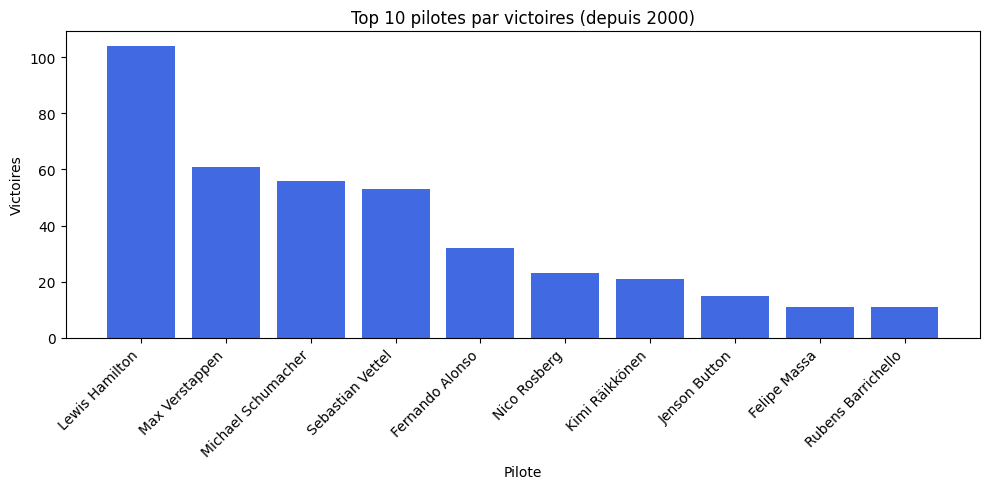

In [382]:
recent_races = races[races["year"] >= 2000]
results_recent = results[results["raceId"].isin(recent_races["raceId"])].copy()
results_recent.loc[:, "positionOrder"] = pd.to_numeric(results_recent["positionOrder"], errors="coerce")

wins = (results_recent.loc[results_recent["positionOrder"] == 1]
                        .groupby("driverId")
                        .size()
                        .sort_values(ascending=False)
                        .head(10))

drv = drivers.set_index("driverId").reindex(wins.index)
labels = (drv["forename"].fillna("") + " " + drv["surname"].fillna("")).str.strip()

plt.figure(figsize=(10,5))
plt.bar(labels, wins.values, color="royalblue")
plt.title("Top 10 pilotes par victoires (depuis 2000)")
plt.xlabel("Pilote")
plt.ylabel("Victoires")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


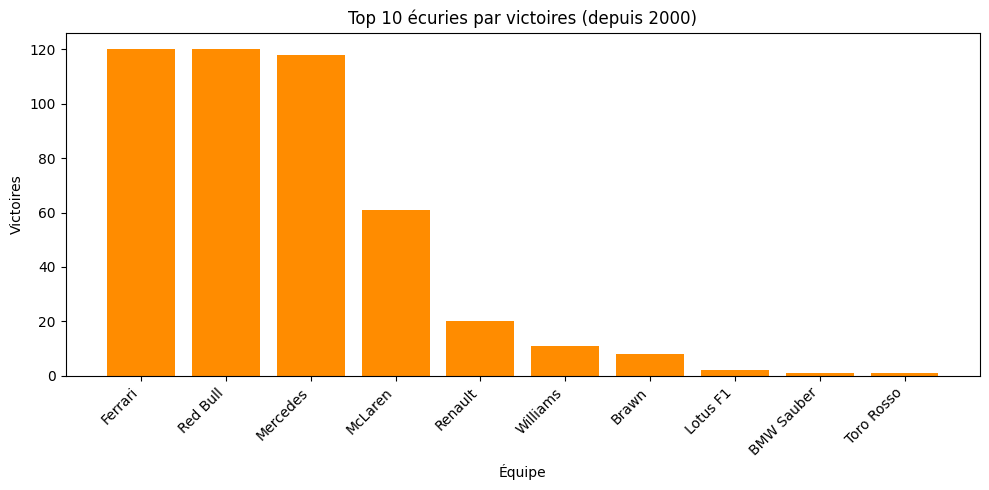

In [ ]:
recent_races = races[races["year"] >= 2000][["raceId"]]

wins_since_2000 = (results.merge(recent_races, on="raceId")
                             .query("positionOrder == 1")
                             .groupby("constructorId")
                             .size()
                             .sort_values(ascending=False)
                             .head(10))  

teams = constructors.set_index("constructorId").reindex(wins_since_2000.index)["name"]

plt.figure(figsize=(10,5))
plt.bar(teams, wins_since_2000.values, color="darkorange")
plt.title("Top 10 écuries par victoires (depuis 2000)")
plt.xlabel("Équipe")
plt.ylabel("Victoires")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

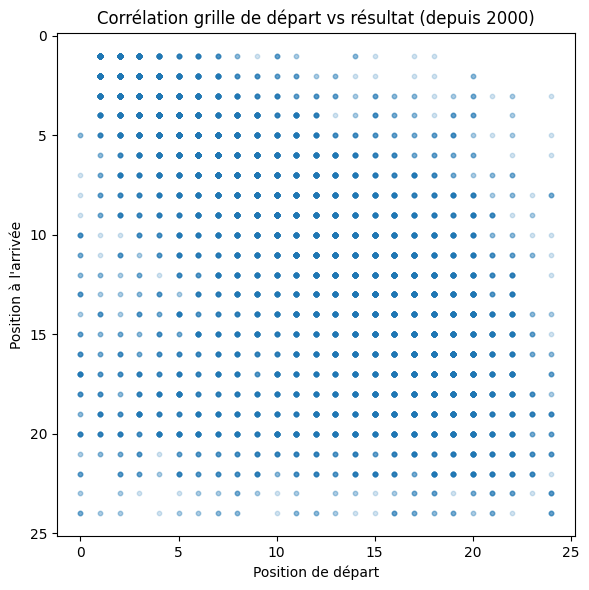

In [361]:
results_recent["grid"] = pd.to_numeric(results_recent["grid"], errors="coerce")
results_recent["positionOrder"] = pd.to_numeric(results_recent["positionOrder"], errors="coerce")

plt.figure(figsize=(6,6))
plt.scatter(results_recent["grid"], results_recent["positionOrder"], alpha=0.2, s=10)
plt.title("Corrélation grille de départ vs résultat (depuis 2000)")
plt.xlabel("Position de départ")
plt.ylabel("Position à l'arrivée")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


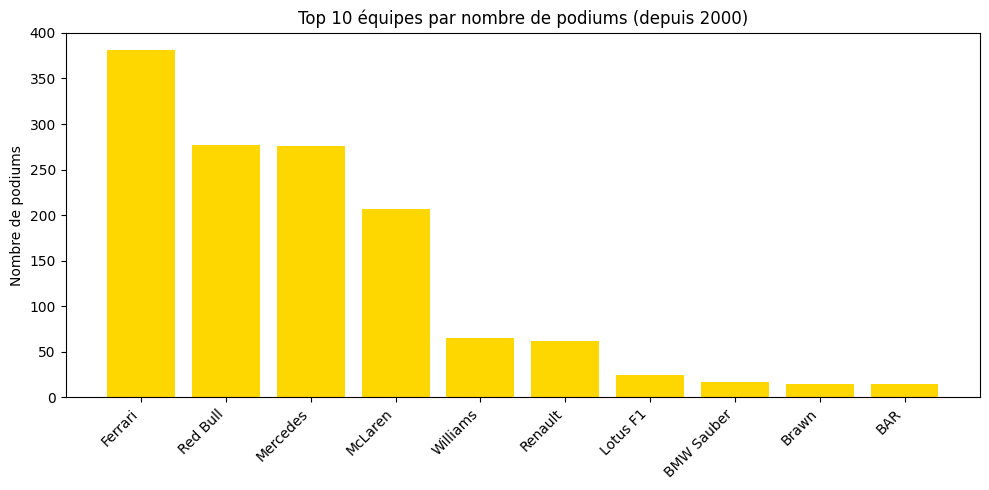

In [362]:
constructors = pd.read_csv("constructors.csv")

podiums = results_recent[results_recent["positionOrder"] <= 3]
team_podiums = podiums.groupby("constructorId").size().sort_values(ascending=False).head(10)
teams = constructors.set_index("constructorId").loc[team_podiums.index, "name"]

plt.figure(figsize=(10,5))
plt.bar(teams, team_podiums.values, color="gold")
plt.title("Top 10 équipes par nombre de podiums (depuis 2000)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Nombre de podiums")
plt.tight_layout()
plt.show()


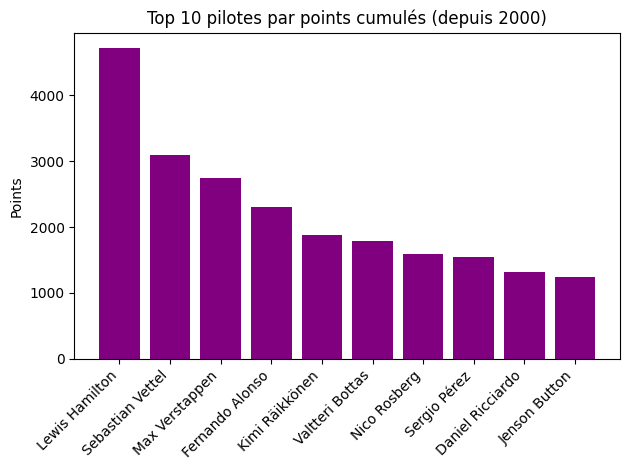

In [363]:

results = pd.read_csv("results.csv")
drivers = pd.read_csv("drivers.csv")
races = pd.read_csv("races.csv")

recent_races = races[races["year"] >= 2000][["raceId"]]
results_recent = results.merge(recent_races, on="raceId")
points = results_recent.groupby("driverId")["points"].sum().sort_values(ascending=False).head(10)

drivers = drivers.set_index("driverId")
names = (drivers.loc[points.index,"forename"] + " " + drivers.loc[points.index,"surname"])
plt.bar(names, points.values, color="purple")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 pilotes par points cumulés (depuis 2000)")
plt.ylabel("Points")
plt.tight_layout()
plt.show()


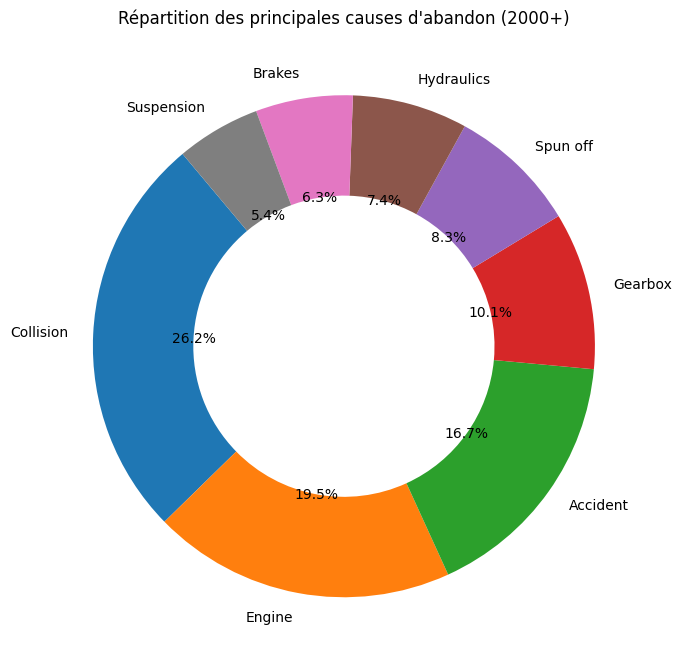

In [ ]:
status_df = pd.read_csv("status.csv")  

recent_races = races.loc[races["year"] >= 2000, ["raceId"]]
res_recent   = results.merge(recent_races, on="raceId", how="inner")

res_recent = res_recent.merge(status_df[["statusId","status"]], on="statusId", how="left")

dnf = res_recent[~res_recent["status"].eq("Finished") & ~res_recent["status"].str.startswith("+", na=False)]

causes = dnf["status"].value_counts().head(8)

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(causes.values,
       labels=causes.index,
       autopct="%1.1f%%",
       startangle=130,
       wedgeprops={"width": 0.4})
ax.set_title("Répartition des principales causes d'abandon (2000+)")
plt.tight_layout()
plt.show()

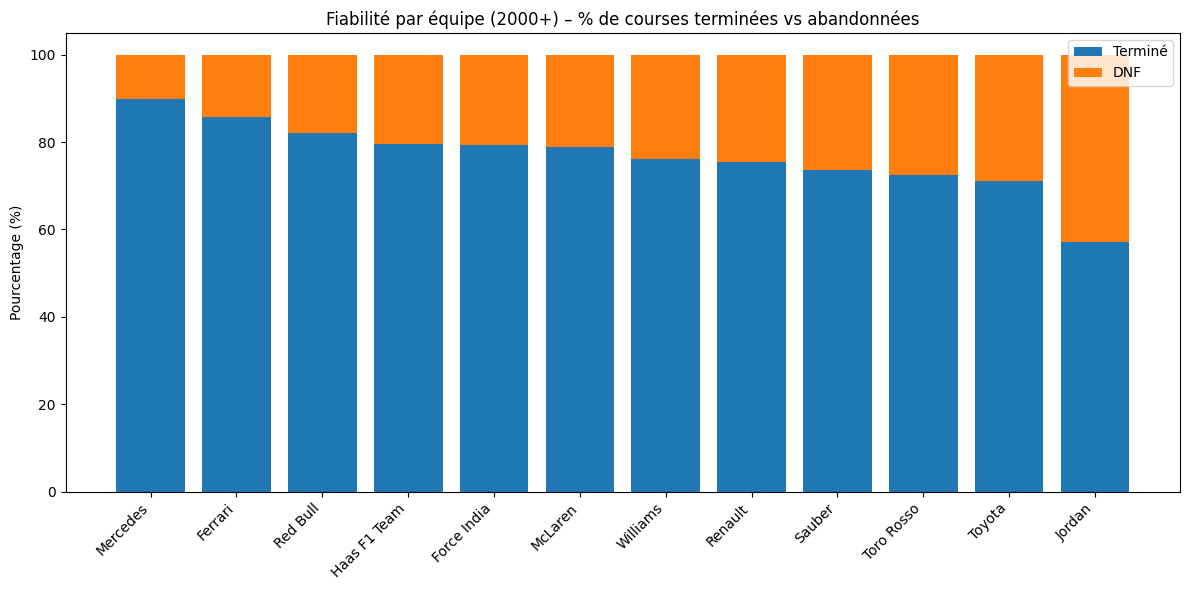

In [ ]:
results = pd.read_csv("results.csv")
races   = pd.read_csv("races.csv")
status  = pd.read_csv("status.csv")
teams   = pd.read_csv("constructors.csv")


recent = races.loc[races["year"] >= 2000, ["raceId"]]
res = results.merge(recent, on="raceId", how="inner").merge(status, on="statusId", how="left")


is_finished = res["status"].eq("Finished")
is_lapped   = res["status"].str.startswith("+", na=False)
res["outcome"] = pd.Series(pd.NA)
res.loc[is_finished | is_lapped, "outcome"] = "Finished"
res.loc[~(is_finished | is_lapped), "outcome"] = "DNF"


res = res.merge(teams[["constructorId","name"]], on="constructorId", how="left").rename(columns={"name":"team"})


starts_by_team = res.groupby("team").size().sort_values(ascending=False)
keep_teams = starts_by_team.head(12).index
res = res[res["team"].isin(keep_teams)]


pct = (res.pivot_table(index="team", columns="outcome", values="driverId", aggfunc="count", fill_value=0)
         .assign(Total=lambda d: d.sum(axis=1)))
for col in ["Finished","DNF"]:
    if col not in pct.columns: pct[col] = 0
pct = pct[["Finished","DNF","Total"]]
pct["Finished %"] = 100 * pct["Finished"] / pct["Total"]
pct["DNF %"]      = 100 * pct["DNF"] / pct["Total"]
pct = pct.sort_values("DNF %")  

plt.figure(figsize=(12,6))
plt.bar(pct.index, pct["Finished %"], label="Terminé")
plt.bar(pct.index, pct["DNF %"], bottom=pct["Finished %"], label="DNF")
plt.title("Fiabilité par équipe (2000+) – % de courses terminées vs abandonnées")
plt.ylabel("Pourcentage (%)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


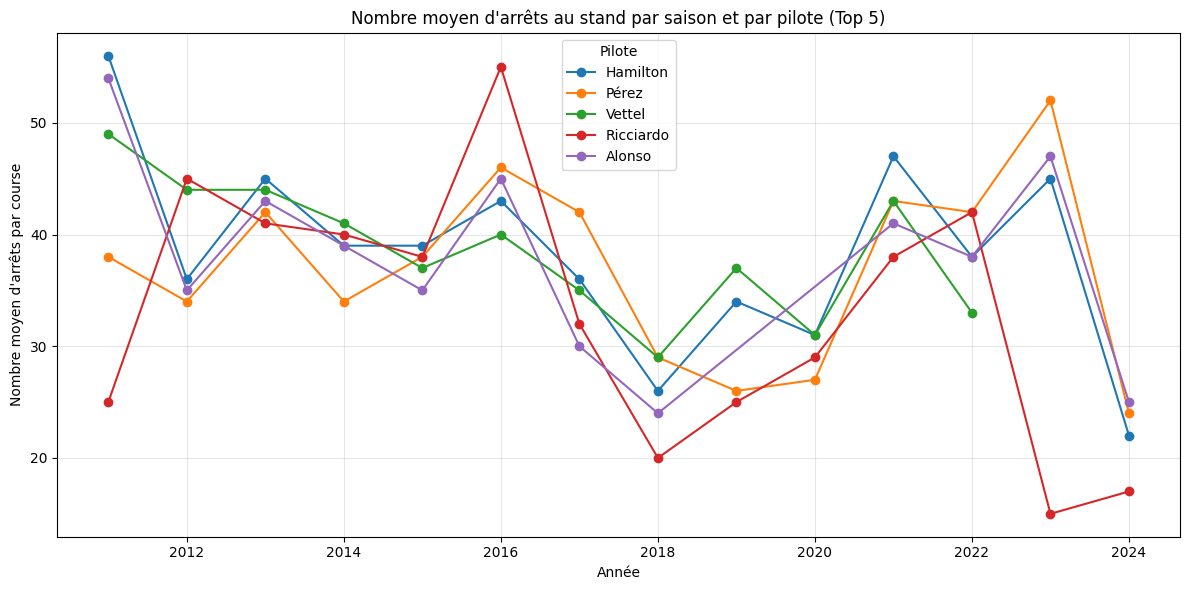

In [ ]:
pit = pd.read_csv("pit_stops.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
drivers = pd.read_csv("drivers.csv")


pit_driver = pit.merge(results[["raceId","driverId"]], on=["raceId","driverId"], how="left")
pit_driver = pit_driver.merge(races[["raceId","year"]], on="raceId", how="left")
pit_driver = pit_driver.merge(drivers[["driverId","surname"]], on="driverId", how="left")

pit_driver = pit_driver[pit_driver["year"] >= 2000]

avg_stops_driver = pit_driver.groupby(["year","surname"])["stop"].count().reset_index(name="pit_count")
top_drivers = avg_stops_driver.groupby("surname")["pit_count"].sum().sort_values(ascending=False).head(5).index
avg_stops_driver = avg_stops_driver[avg_stops_driver["surname"].isin(top_drivers)]

plt.figure(figsize=(12,6))
for driver in top_drivers:
    data = avg_stops_driver[avg_stops_driver["surname"] == driver]
    plt.plot(data["year"], data["pit_count"], marker="o", label=driver)

plt.title("Nombre moyen d'arrêts au stand par saison et par pilote (Top 5)")
plt.xlabel("Année")
plt.ylabel("Nombre moyen d'arrêts par course")
plt.legend(title="Pilote")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


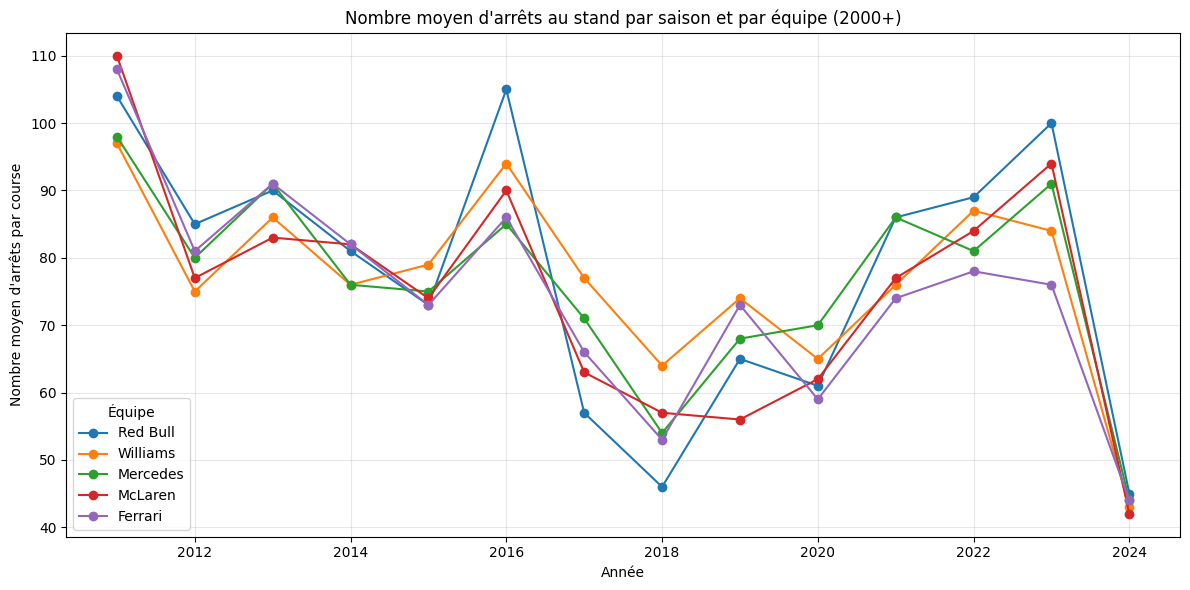

In [ ]:
pit = pd.read_csv("pit_stops.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")
teams = pd.read_csv("constructors.csv")

pit_team = pit.merge(results[["raceId","driverId","constructorId"]], on=["raceId","driverId"], how="left")
pit_team = pit_team.merge(races[["raceId","year"]], on="raceId", how="left")
pit_team = pit_team.merge(teams[["constructorId","name"]], on="constructorId", how="left").rename(columns={"name":"team"})

pit_team = pit_team[pit_team["year"] >= 2000]

avg_stops = pit_team.groupby(["year","team"])["stop"].count().reset_index(name="pit_count")
avg_stops_per_season = avg_stops.groupby(["year","team"])["pit_count"].mean().reset_index()


top_teams = avg_stops_per_season.groupby("team")["pit_count"].sum().sort_values(ascending=False).head(5).index
avg_stops_per_season = avg_stops_per_season[avg_stops_per_season["team"].isin(top_teams)]

plt.figure(figsize=(12,6))
for team in top_teams:
    data = avg_stops_per_season[avg_stops_per_season["team"] == team]
    plt.plot(data["year"], data["pit_count"], marker="o", label=team)

plt.title("Nombre moyen d'arrêts au stand par saison et par équipe (2000+)")
plt.xlabel("Année")
plt.ylabel("Nombre moyen d'arrêts par course")
plt.legend(title="Équipe")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


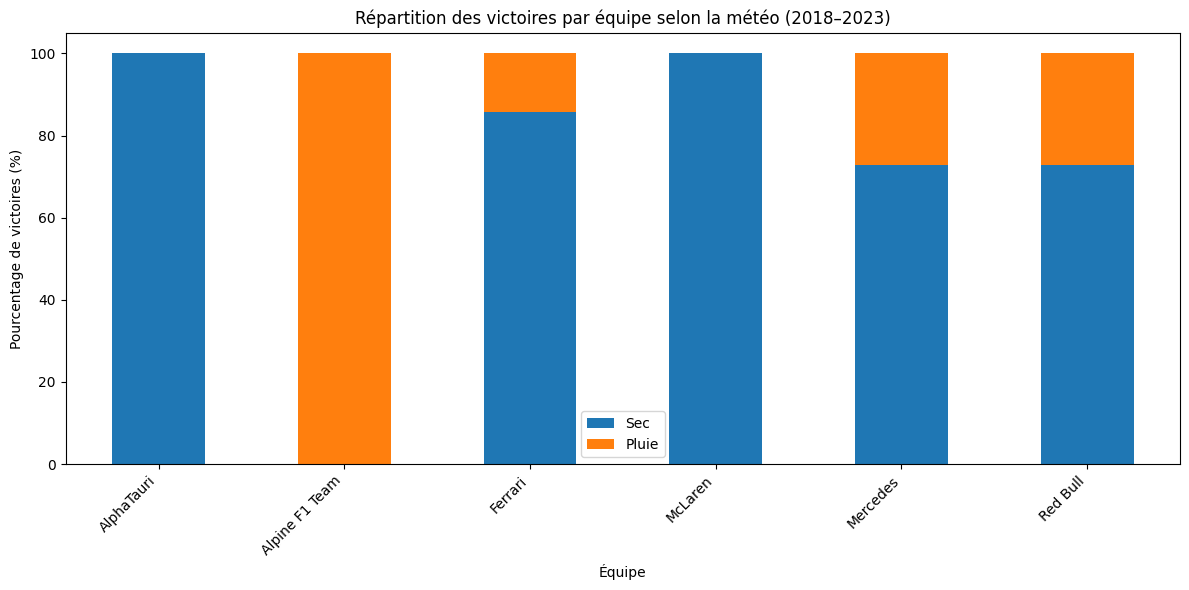

In [ ]:
weather = pd.read_csv("F1 Weather(2023-2018) (1).csv")
races = pd.read_csv("races.csv")[["raceId","year","round","name"]]
results = pd.read_csv("results.csv")[["raceId","driverId","constructorId","positionOrder"]]
constructors = pd.read_csv("constructors.csv")[["constructorId","name"]].rename(columns={"name":"team"})

weather = weather.rename(columns={"Year":"year","Round Number":"round","Rainfall":"rain"})
weather["year"] = pd.to_numeric(weather["year"], errors="coerce")
weather["round"] = pd.to_numeric(weather["round"], errors="coerce")

w_race = (weather.groupby(["year","round"])["rain"].any()
          .reset_index()
          .rename(columns={"rain":"is_rain"}))

rw = races.merge(w_race, on=["year","round"], how="inner")

winners = results[results["positionOrder"] == 1]

win_weather = (winners.merge(rw[["raceId","is_rain"]], on="raceId", how="inner")
                      .merge(constructors, on="constructorId", how="left"))

win_counts = win_weather.groupby(["team","is_rain"]).size().unstack(fill_value=0)
win_percent = win_counts.div(win_counts.sum(axis=1), axis=0) * 100
win_percent.columns = ["Sec","Pluie"]


win_percent.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Répartition des victoires par équipe selon la météo (2018–2023)")
plt.ylabel("Pourcentage de victoires (%)")
plt.xlabel("Équipe")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


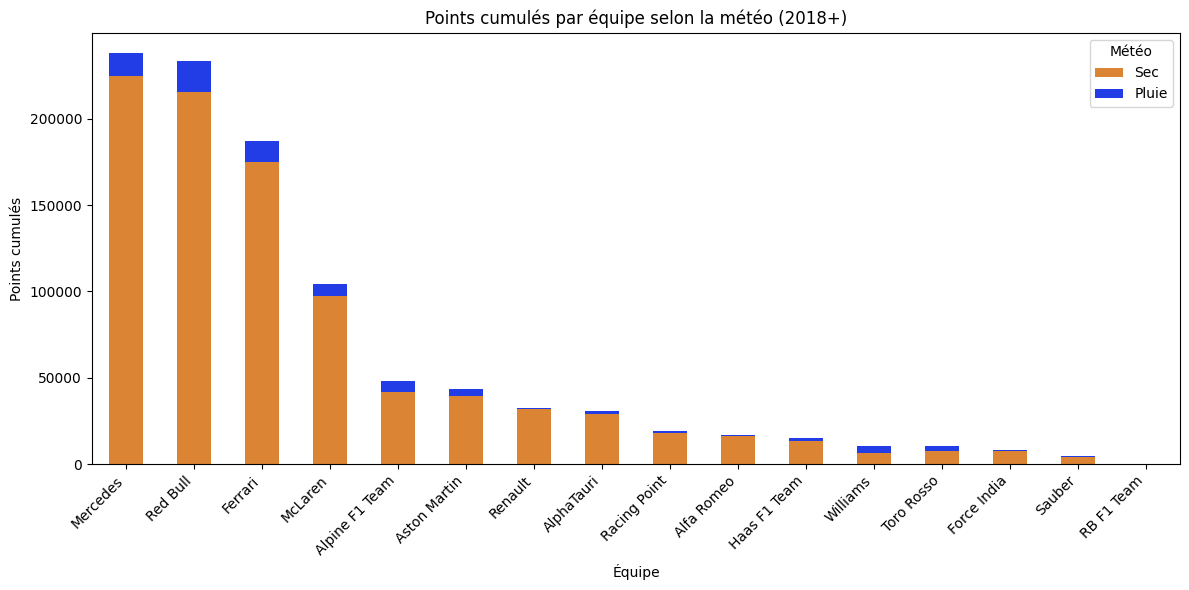

In [ ]:
df = pd.read_csv("dataset_f1_recent.csv")


df["positionOrder"] = pd.to_numeric(df["positionOrder"], errors="coerce")

df["points"] = df["positionOrder"].apply(lambda x: 0 if pd.isna(x) or x > 10 else (11 - x))

team_points_weather = (
    df.groupby(["team","is_rain"])["points"]
    .sum()
    .reset_index()
)

team_points_pivot = team_points_weather.pivot(index="team", columns="is_rain", values="points").fillna(0)
team_points_pivot.columns = ["Sec","Pluie"]


team_points_pivot["Total"] = team_points_pivot["Sec"] + team_points_pivot["Pluie"]
team_points_pivot = team_points_pivot.sort_values("Total", ascending=False)


team_points_pivot[["Sec","Pluie"]].plot(kind="bar", stacked=True, figsize=(12,6), color=["#db8534","#223ce6"])
plt.title("Points cumulés par équipe selon la météo (2018+)")
plt.ylabel("Points cumulés")
plt.xlabel("Équipe")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Météo")
plt.tight_layout()
plt.show()


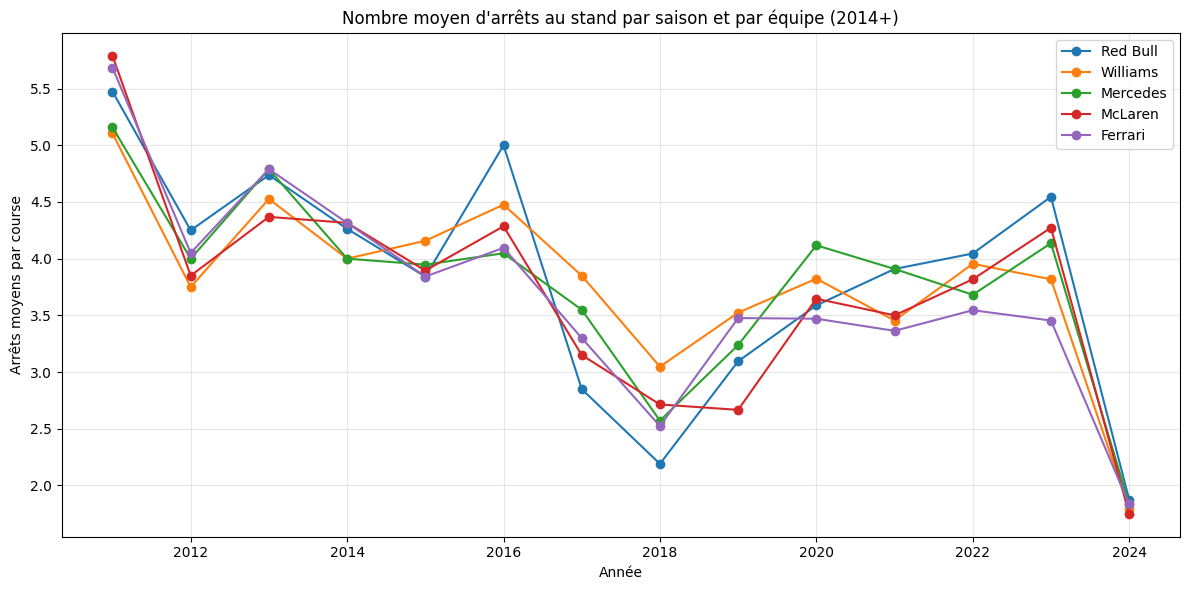

In [ ]:
pit_results = pit_stops.merge(races[["raceId", "year"]], on="raceId", how="left")
if "constructorId" in results.columns:  
    pit_results = pit_results.merge(results[["raceId", "driverId", "constructorId"]],
                                    on=["raceId", "driverId"], how="left")
    pit_results = pit_results.merge(constructors[["constructorId", "name"]],
                                    on="constructorId", how="left")
else:
    pit_results["name"] = "Unknown"


pit_results["stop"] = pd.to_numeric(pit_results["stop"], errors="coerce")
pit_results["year"] = pd.to_numeric(pit_results["year"], errors="coerce")
pit_results = pit_results.dropna(subset=["year", "stop"])


avg_pit_by_team = (
    pit_results.groupby(["year","name"])["stop"]
    .count()
    .reset_index()
    .rename(columns={"stop":"total_stops"})
)

races_per_year = races.groupby("year")["raceId"].nunique().reset_index(name="race_count")
avg_pit_by_team = avg_pit_by_team.merge(races_per_year, on="year", how="left")
avg_pit_by_team["avg_stops_per_race"] = avg_pit_by_team["total_stops"] / avg_pit_by_team["race_count"]


top_teams = (
    avg_pit_by_team.groupby("name")["total_stops"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)
avg_pit_by_team = avg_pit_by_team[avg_pit_by_team["name"].isin(top_teams)]

plt.figure(figsize=(12,6))
for team in top_teams:
    data = avg_pit_by_team[avg_pit_by_team["name"] == team]
    plt.plot(data["year"], data["avg_stops_per_race"], marker="o", label=team)

plt.title("Nombre moyen d'arrêts au stand par saison et par équipe (2014+)")
plt.xlabel("Année")
plt.ylabel("Arrêts moyens par course")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


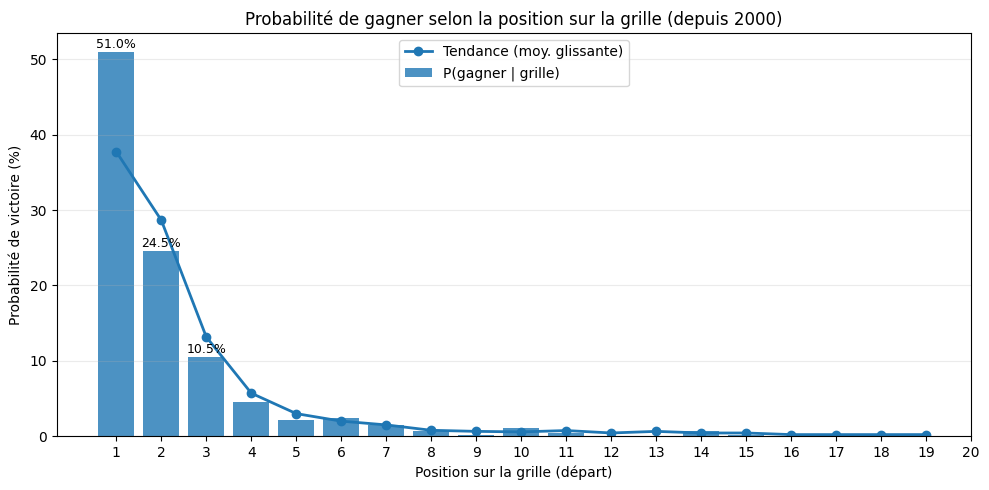

grid
1     51.0
2     24.5
3     10.5
4      4.5
5      2.1
6      2.4
7      1.5
8      0.6
9      0.2
10     1.1
11     0.4
12     NaN
13     NaN
14     0.6
15     0.2
16     NaN
17     0.2
18     0.2
19     NaN
20     NaN
Name: raceId, dtype: float64

In [ ]:
results = pd.read_csv("results.csv")
races   = pd.read_csv("races.csv")[["raceId","year"]]

df = results.merge(races, on="raceId", how="inner")
df["grid"] = pd.to_numeric(df["grid"], errors="coerce")
df["positionOrder"] = pd.to_numeric(df["positionOrder"], errors="coerce")
df = df[(df["year"] >= 2000) & (df["grid"].between(1, 20)) & (df["positionOrder"] >= 1)]

starts = df.groupby("grid")["raceId"].count()                      
wins   = df.loc[df["positionOrder"] == 1].groupby("grid")["raceId"].count()

grids = pd.Index(range(1, 21), name="grid")
p_win = (wins / starts).reindex(grids, fill_value=0.0)

trend = p_win.rolling(3, center=True, min_periods=1).mean()

plt.figure(figsize=(10,5))
bars = plt.bar(p_win.index, (p_win.values*100), width=0.8, alpha=0.8, label="P(gagner | grille)")

plt.plot(trend.index, (trend.values*100), linewidth=2, marker="o", label="Tendance (moy. glissante)")

for g in [1, 2, 3]:
    val = p_win.loc[g]*100
    plt.text(g, val + 0.6, f"{val:.1f}%", ha="center", fontsize=9)

plt.xticks(range(1,21))
plt.xlabel("Position sur la grille (départ)")
plt.ylabel("Probabilité de victoire (%)")
plt.title("Probabilité de gagner selon la position sur la grille (depuis 2000)")
plt.grid(axis="y", alpha=0.25)
plt.legend()
plt.tight_layout()


plt.show()


p_win.multiply(100).round(1)


In [ ]:
races        = pd.read_csv("races.csv")
results      = pd.read_csv("results.csv")
drivers      = pd.read_csv("drivers.csv")
constructors = pd.read_csv("constructors.csv")
status       = pd.read_csv("status.csv")
pit_stops    = pd.read_csv("pit_stops.csv")
weather      = pd.read_csv("F1 Weather(2023-2018) (1).csv")


races = races[races["year"] >= 2018]

df = results.merge(
    races[["raceId","year","round","name"]].rename(columns={"name":"gp_name"}),
    on="raceId", how="inner"
)

df = df.merge(drivers[["driverId","forename","surname"]], on="driverId", how="left")
df = df.merge(
    constructors[["constructorId","name"]].rename(columns={"name":"team"}),
    on="constructorId", how="left"
)

df = df.merge(status[["statusId","status"]], on="statusId", how="left")
df["is_dnf"] = ~df["status"].str.contains(r"Finished|\+\d+ Laps", case=False, na=False)

if "milliseconds" not in pit_stops.columns and "duration" in pit_stops.columns:
    pit_stops["duration"] = pd.to_numeric(pit_stops["duration"], errors="coerce")
    pit_stops["milliseconds"] = pit_stops["duration"] * 1000

pit_agg = pit_stops.groupby(["raceId","driverId"]).agg(
    n_pitstops=("stop","count"),
    avg_pit_ms=("milliseconds","mean")
).reset_index()

df = df.merge(pit_agg, on=["raceId","driverId"], how="left")
df["n_pitstops"] = df["n_pitstops"].fillna(0).astype(int)
df["avg_pit_ms"] = df["avg_pit_ms"].fillna(df["avg_pit_ms"].median())

weather = weather.rename(columns={"Year":"year","Round Number":"round","Rainfall":"rain"})
weather["is_rain"] = weather["rain"].astype(str).str.lower().isin(["true","yes","1"])
df = df.merge(weather[["year","round","is_rain"]], on=["year","round"], how="left")
df["is_rain"] = df["is_rain"].fillna(False)
df["is_dry"] = ~df["is_rain"]  

df["grid"] = pd.to_numeric(df["grid"], errors="coerce")
df["positionOrder"] = pd.to_numeric(df["positionOrder"], errors="coerce")
df["places_gained"] = df["grid"] - df["positionOrder"]

df_final = df[[
    "year","round","gp_name","forename","surname","team",
    "grid","positionOrder","places_gained",
    "is_dnf","n_pitstops","avg_pit_ms","is_rain","is_dry"
]]

df_final.to_csv("dataset_f1_recent.csv", index=False)
df_final.head()
df_final.to_csv("dataset_f1_recent.csv", index=False)
df_final.head()

df_final["win"] = (df_final["positionOrder"] == 1).astype(int)
df_final["podium"] = (df_final["positionOrder"] <= 3).astype(int)
df_final["top10"] = (df_final["positionOrder"] <= 10).astype(int)
df_final.to_csv("dataset_f1_ml_ready.csv", index=False)



/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/1556158356.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["is_rain"] = df["is_rain"].fillna(False)
/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/1556158356.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["win"] = (df_final["positionOrder"] == 1).astype(int)
/var/folders/6y/bgq48wy56sl55016m2z598fh0000gn/T/ipykernel_50813/1556158356.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra